In [356]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

In [357]:
df = pd.read_csv(r"CarPrice_Assignment.csv")

<Axes: >

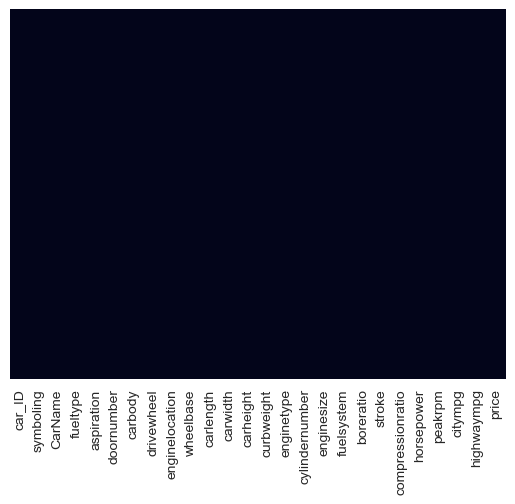

In [358]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [359]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [361]:
df['symboling'] = df['symboling'].astype('object')

In [362]:
X = pd.DataFrame(df[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']])
y = df['price']

In [363]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [364]:
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [365]:
df_dummies = pd.get_dummies(df_categorical, drop_first = True)
df_dummies = df_dummies.astype(int)
df_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [366]:
X = X.drop(columns = df_categorical.columns, axis=1)

In [367]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 20.9 KB


In [368]:
X = pd.concat([X, df_dummies], axis = 1)

In [369]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    int64  
 12  highwaympg             205 non-null    int64  
 13  symboling_-1           205 non-null    int64  
 14  symboling_0            205 non-null    int64  
 15  symbol

In [370]:
cwmedian = X['curbweight'].median()
cwstd =X['curbweight'].std()
X.loc[(X['curbweight']-cwmedian).abs()>cwstd, 'curbweight'] = np.nan
X['curbweight'] = X['curbweight'].fillna(value=X['curbweight'].median())

# TRAIN MODEL

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)

In [372]:
from sklearn.linear_model import LinearRegression

In [373]:
linear_model = LinearRegression()

In [374]:
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [375]:
print('Coef: ', linear_model.coef_)

Coef:  [ 1.42606374e+02 -1.87399897e+01  9.00665307e+02  7.29101786e+01
 -1.03204619e+00  1.02542540e+02 -7.45037192e+02 -4.99489318e+03
 -1.59496969e+01  2.47847868e+01  1.66813552e+00 -2.02737648e+02
  1.68804037e+02  1.97680631e+03  2.81449801e+03  2.84603446e+03
  3.11286849e+03  3.34668269e+03 -7.39275702e+01  2.63297267e+03
 -4.23618148e+02 -3.75036866e+03 -3.95942171e+03 -3.35809851e+03
 -4.21047393e+03 -2.40506455e+03 -1.25410236e+03  8.46116167e+03
 -9.69510156e+03 -1.91059193e+03  2.54118760e+03 -6.09510908e+02
 -6.35473825e+03 -1.27896768e+03 -9.38710625e+03 -1.04901922e+04
 -6.67256428e+03 -5.45696821e-12 -9.48984013e+03 -1.27896768e+03
 -1.99248488e+03 -3.06668225e+03  7.39275702e+01 -3.70718827e+03
 -2.11626262e+03 -3.73463705e+03 -1.22033628e+03]


In [376]:
prediction = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

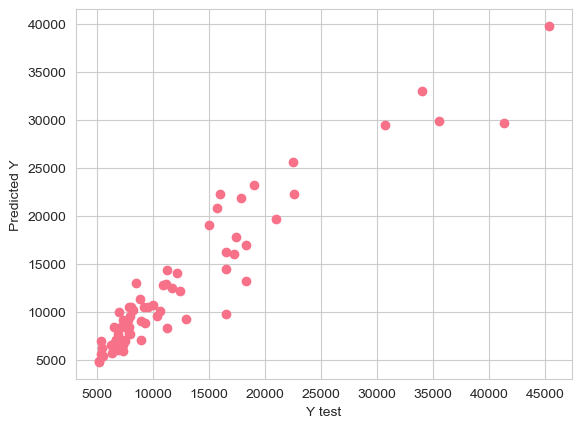

In [377]:
sns.set_palette('husl')
sns.set_style('whitegrid')
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [378]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  1816.9327374497911
MSE:  7407706.285377806
RMSE:  2721.7101765944526


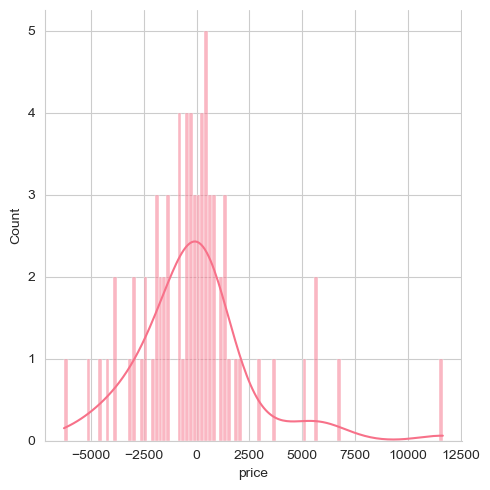

In [379]:
sns.displot((y_test-prediction), bins=100, kde = True)

In [380]:
X_test

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
120,93.7,157.3,63.8,50.6,1967.0,90,2.97,3.23,9.4,68,...,0,0,0,1,0,0,0,0,0,0
185,97.3,171.7,65.5,55.7,2212.0,109,3.19,3.40,9.0,85,...,0,0,0,0,0,0,0,1,0,0
180,104.5,187.8,66.5,54.1,2328.0,171,3.27,3.35,9.2,156,...,0,0,0,0,0,0,0,1,0,0
119,93.7,157.3,63.8,50.8,2128.0,98,3.03,3.39,7.6,102,...,0,0,0,0,0,0,0,0,1,0
109,114.2,198.9,68.4,58.7,2328.0,120,3.46,3.19,8.4,97,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,93.1,166.8,64.2,54.1,1945.0,91,3.03,3.15,9.0,68,...,0,0,0,1,0,0,0,0,0,0
93,94.5,170.2,63.8,53.5,2024.0,97,3.15,3.29,9.4,69,...,0,0,0,1,0,0,0,0,0,0
165,94.5,168.7,64.0,52.6,2265.0,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
127,89.5,168.9,65.0,51.6,2756.0,194,3.74,2.90,9.5,207,...,0,0,0,0,0,0,0,1,0,0


In [381]:
data = {
    'wheelbase' : [200],
    'carlength' : [200],
    'carwidth' : [100],
    'carheight' : [60],
    'curbweight' : [3000],
    'enginesize' : [200],
    'boreratio' : [200],
    'stroke' : [4],
    'compressionratio' : [20],
    'horsepower' : [300],
    'peakrpm' : [300],
    'citympg' : [30],
    'highwaympg' : [100],
    'symboling_-1' : [0],
    'symboling_0' : [0],
    'symboling_1' : [0],
    'symboling_2' : [0],
    'symboling_3' : [0],
    'fueltype_gas' : [0],
    'aspiration_turbo' : [0],
    'doornumber_two' : [0],
    'carbody_hardtop' : [0],
    'carbody_hatchback' :[0],
    'carbody_sedan' : [0],
    'carbody_wagon' : [0],
    'drivewheel_fwd' : [0],
    'drivewheel_rwd' : [0],
    'enginelocation_rear' : [0],
    'enginetype_dohcv' : [0],
    'enginetype_l' : [0],
    'enginetype_ohc' : [0],
    'enginetype_ohcf' : [0],
    'enginetype_ohcv' : [0],
    'enginetype_rotor' : [0],
    'cylindernumber_five' : [0],
    'cylindernumber_four' : [0],
    'cylindernumber_six' : [0],
    'cylindernumber_three' : [0],
    'cylindernumber_twelve' : [0],
    'cylindernumber_two' : [0],
    'fuelsystem_2bbl' : [0],
    'fuelsystem_4bbl' : [0],
    'fuelsystem_idi' : [0],
    'fuelsystem_mfi' : [0],
    'fuelsystem_mpfi' : [0],
    'fuelsystem_spdi' : [0],
    'fuelsystem_spfi' : [0]
}

df_pred = pd.DataFrame(data)

In [382]:
new_pred = linear_model.predict(df_pred)

In [383]:
print(new_pred)

[-65202.32523547]
